Importing necessary modules

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Creating the databases for the different companies

In [66]:
appleDf = pd.read_csv('data_bases/apple.csv')
googleDf = pd.read_csv('data_bases/google.csv')
microsoftDf = pd.read_csv('data_bases/microsoft.csv')
twitterDf = pd.read_csv('data_bases/twitter.csv')

n_apple = len(appleDf)
n_google = len(googleDf)
n_microsoft = len(microsoftDf)
n_twitter = len(twitterDf)


Counting positive and negative tweets for each company

In [67]:
def countTweets(df):
    positive = (df['target'] == 4).sum()
    negative = (df['target'] == 0).sum()
    neutral = (df['target'] == 2).sum()
    return positive, neutral, negative

applePos, appleNeut, appleNeg = countTweets(appleDf)
googlePos, googleNeut, googleNeg= countTweets(googleDf)
microsoftPos, microsoftNeut, microsoftNeg = countTweets(microsoftDf)
twitterPos, twitterNeut, twitterNeg = countTweets(twitterDf)

Visualising the different tweet counts

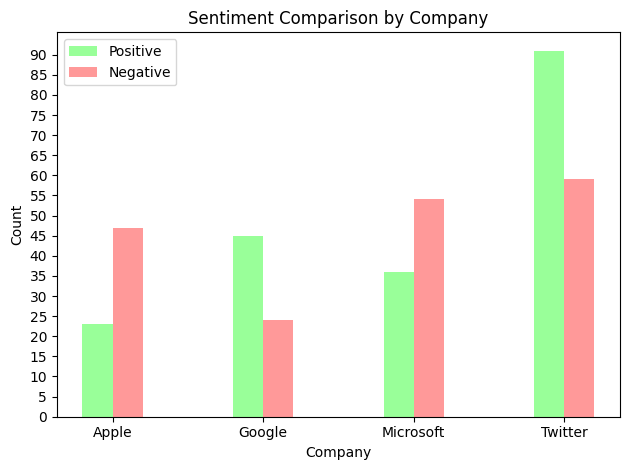

In [68]:
companies = ['Apple', 'Google', 'Microsoft', 'Twitter']
positive = [applePos, googlePos, microsoftPos, twitterPos]
neutral = [appleNeut, googleNeut, microsoftNeut, twitterNeut]
negative = [appleNeg, googleNeg, microsoftNeg, twitterNeg]

bar_width = 0.2
x = np.arange(len(companies))

if all(value != 0 for value in neutral):
    plt.figure(figsize=(10, 6))
    plt.bar(x-bar_width, positive, width=bar_width, label='Positive', color='#99ff99')
    plt.bar(x, neutral, width=bar_width, label='Neutral', color='#66b3ff')
    plt.bar(x + bar_width, negative, width=bar_width, label='Negative', color='#ff9999')
    plt.xlabel('Company')
    plt.ylabel('Count')
    plt.title('Sentiment Comparison by Company')
    plt.xticks(x, companies)
    y_ticks = np.arange(0, max(positive + neutral + negative) + 1, step=5) 
    plt.yticks(y_ticks)
else : 
    plt.bar(x, positive, width=bar_width, label='Positive', color='#99ff99')
    plt.bar(x + bar_width, negative, width=bar_width, label='Negative', color='#ff9999')
    plt.xlabel('Company')
    plt.ylabel('Count')
    plt.title('Sentiment Comparison by Company')
    plt.xticks(x + (bar_width)/2, companies)
    y_ticks = np.arange(0, max(positive +  negative) + 1, step=5) 
    plt.yticks(y_ticks)

plt.legend()
plt.tight_layout()
plt.show()

Calculating the median for each company

In [69]:
appleMedianTarget = appleDf['target'].median()
googleMedianTarget = googleDf['target'].median()
microsoftMedianTarget = microsoftDf['target'].median()
twitterMedianTarget = twitterDf['target'].median()

print(f"Median target for Apple: {appleMedianTarget}")
print(f"Median target for Google: {googleMedianTarget}")
print(f"Median target for Microsoft: {microsoftMedianTarget}")
print(f"Median target for Twitter: {twitterMedianTarget}")

Median target for Apple: 0.0
Median target for Google: 4.0
Median target for Microsoft: 0.0
Median target for Twitter: 4.0
